In [5]:
import pandas as pd

url = "https://www.data.gouv.fr/fr/datasets/r/ea4f5879-af40-4e3e-949d-812d6eeb5e02"

data = pd.read_csv(url, delimiter=';')

recensement = data[['inst_numero', 'inst_nom', 'dep_nom', 'new_code', 'new_name', 'inst_etat', 
                    'inst_date_creation', 'inst_date_etat', 'inst_date_valid', 'inst_acc_handi_bool', 
                    'inst_trans_bool', 'equip_numero', 'equip_nom', 'equip_type_code', 
                    'equip_type_name', 'equip_type_famille', 'equip_x', 'equip_y', 
                    'equip_etat', 'equip_eclair', 'equip_douche', 'equip_sanit', 
                    'equip_pmr_aire', 'equip_pmr_douche', 'equip_pmr_sanit', 
                    'equip_travaux_date', 'equip_service_date', 'equip_travaux_type', 
                    'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp']]

/tmp/ipykernel_121378/601804400.py:5: DtypeWarning: Columns (4,6,57,69,103,105,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, delimiter=';')


In [6]:
print(data.head(10))
n_lignes = data.shape
print(f"Nombre de lignes : {n_lignes}")

  inst_numero                         inst_nom                   inst_adresse  \
0  I042090005  Complexe sportif Daniel Maffren        73 Avenue de la Durance   
1  I042090005  Complexe sportif Daniel Maffren        73 Avenue de la Durance   
2  I042090009               Poney club du Thor  102 avenue  st domnin le thor   
3  I042090010      Site d'escalade de La Baume                       SISTERON   
4  I042090010      Site d'escalade de La Baume                       SISTERON   
5  I042090010      Site d'escalade de La Baume                       SISTERON   
6  I042090010      Site d'escalade de La Baume                       SISTERON   
7  I042090010      Site d'escalade de La Baume                       SISTERON   
8  I042090014               Piscine Municipale              Quartier Beaulieu   
9  I042090015              Boulodrome Val Gele      chemin de la machine fixe   

   inst_cp inst_com_code inst_com_nom new_code  new_name  inst_actif  \
0   4200.0          4209     Sistero

In [7]:
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))
print(doublons.head)

<bound method NDFrame.head of                                  inst_nom new_code  n
0           "Aire de jeux" Calebassiers 3    97411  1
1                           "Le Sépulcre"    22187  2
2           "Le circuit de Saint Mathieu"    29190  1
3       "Le circuit de Saint-Demet" N° 22    29215  1
4             "le 107" saut à l'élastique    48094  1
...                                   ...      ... ..
166992                   étang des pelles    25085  1
166993                    étangs de pêche    42293  1
166994                    étape cavalière    69018  1
166995                    étape cavalière    69018  2
166996                  étrier de Moselle    57534  4

[166997 rows x 3 columns]>


In [8]:
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')

df_epure = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

/tmp/ipykernel_121378/2049927570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')


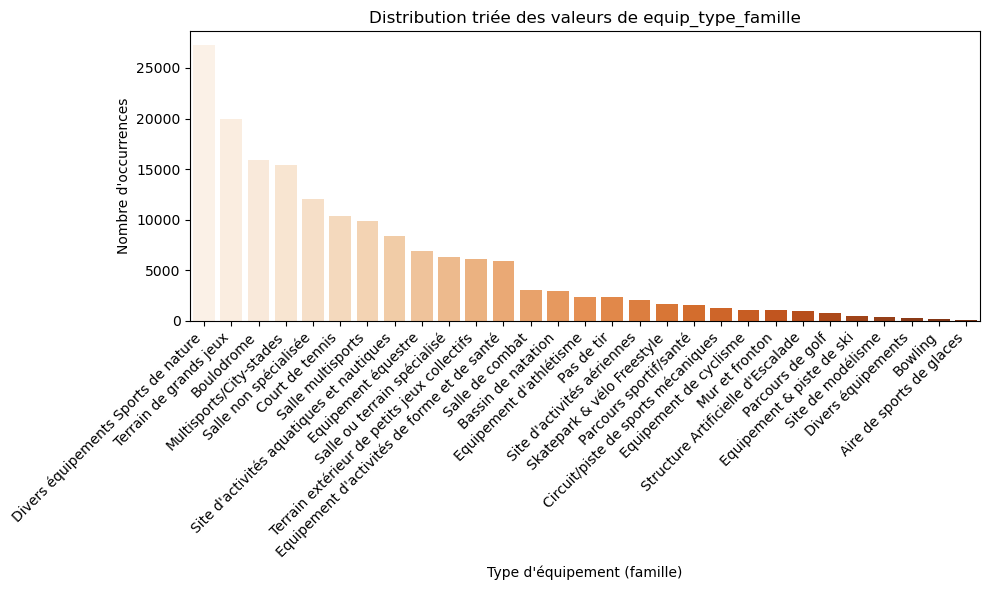

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquences
freq_table = pd.DataFrame(df_epure['equip_type_famille'].value_counts()).reset_index()
freq_table.columns = ['Var1', 'Freq']

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')
plt.title("Distribution triée des valeurs de equip_type_famille")
plt.xlabel("Type d'équipement (famille)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

boulodromes_dep = (df_epure[df_epure['equip_type_famille'] == "Boulodrome"]
                   .groupby('dep_nom')
                   .size()
                   .reset_index(name='nombre')
                   .sort_values(by='nombre', ascending=False))

/tmp/ipykernel_121378/3219396892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')


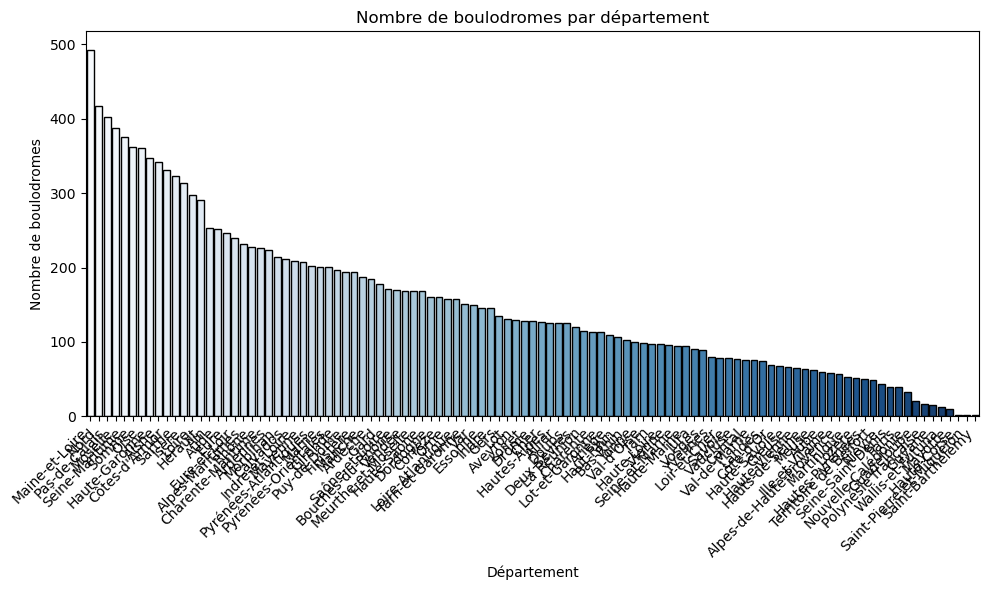

In [10]:
boulodromes_dep = df_epure[df_epure['equip_type_famille'] == "Boulodrome"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de boulodromes par département")
plt.xlabel("Département")
plt.ylabel("Nombre de boulodromes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_121378/4161481416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=tir_dep, palette='Blues', edgecolor='black')


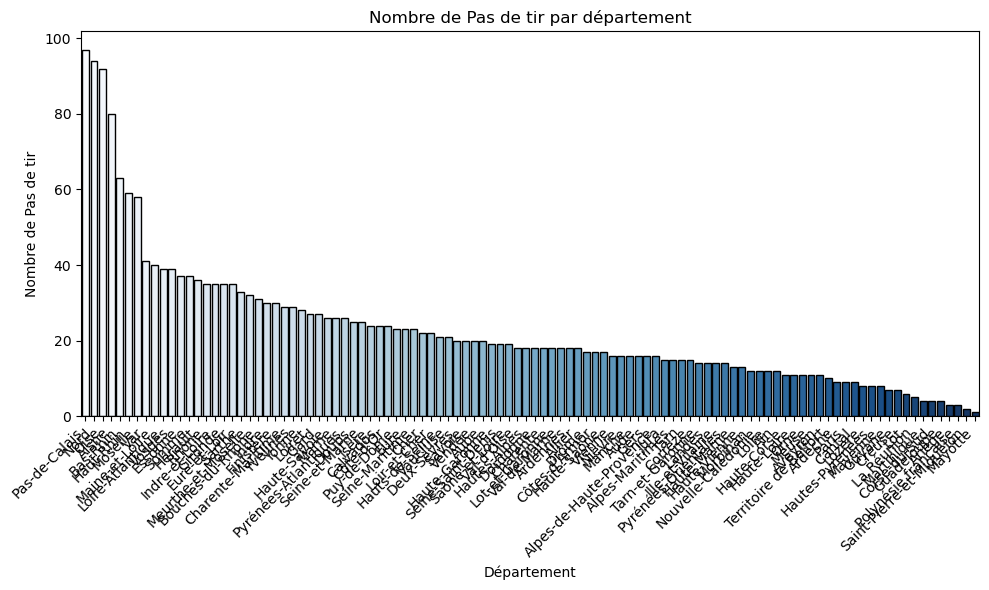

In [11]:
tir_dep = df_epure[df_epure['equip_type_famille'] == "Pas de tir"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=tir_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de Pas de tir par département")
plt.xlabel("Département")
plt.ylabel("Nombre de Pas de tir")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


CARTOGRAPHIE

  code_insee               nom  nuts3              wikipedia  surf_km2  \
0        974        La Réunion  FR940          fr:La Réunion    2505.0   
1         11              Aude  FR811  fr:Aude (département)    6343.0   
2         43       Haute-Loire  FR723         fr:Haute-Loire    5003.0   
3         13  Bouches-du-Rhône  FR823    fr:Bouches-du-Rhône    5247.0   
4         47    Lot-et-Garonne  FR614      fr:Lot-et-Garonne    5385.0   

                                            geometry  
0  MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...  
1  POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...  
2  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...  
3  MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...  
4  POLYGON ((-0.14058 44.22648, -0.12931 44.23218...  


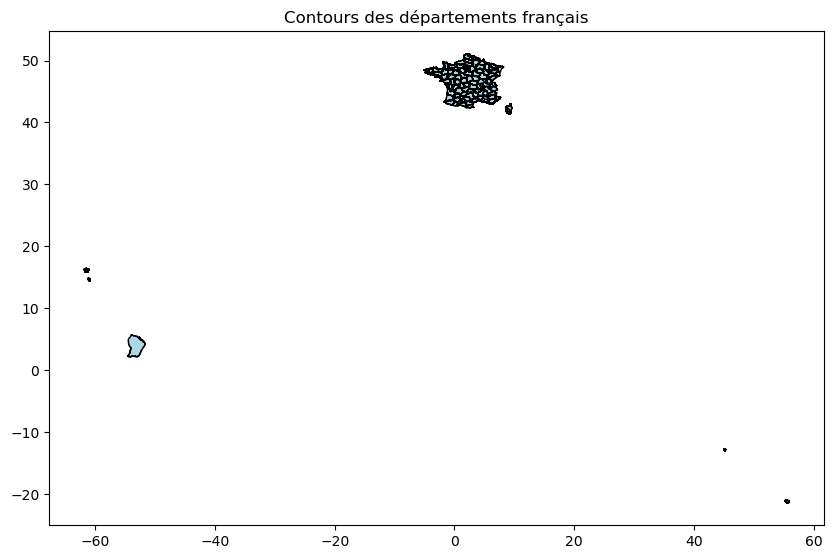

In [37]:
import requests
import geopandas as gpd
from io import BytesIO

# URL de la ressource (fichier GeoJSON)
url2 = "https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce"

# Télécharger le fichier GeoJSON
response = requests.get(url2)

if response.status_code == 200:
    # Charger le fichier dans un GeoDataFrame
    gdf = gpd.read_file(BytesIO(response.content))

    # Afficher les 5 premières lignes du GeoDataFrame
    print(gdf.head())

    # Tracer la carte des départements
    gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
    plt.title("Contours des départements français")
    plt.show()
else:
    print(f"Erreur lors du téléchargement du fichier: {response.status_code}")


In [48]:
gdf_metropole = gdf[~gdf['code_insee'].str.startswith('97')]  # Exclure les départements d'outre-mer
print(gdf_metropole.head)

<bound method NDFrame.head of     code_insee               nom  nuts3                 wikipedia  surf_km2  \
1           11              Aude  FR811     fr:Aude (département)    6343.0   
2           43       Haute-Loire  FR723            fr:Haute-Loire    5003.0   
3           13  Bouches-du-Rhône  FR823       fr:Bouches-du-Rhône    5247.0   
4           47    Lot-et-Garonne  FR614         fr:Lot-et-Garonne    5385.0   
5           23            Creuse  FR632   fr:Creuse (département)    5599.0   
..         ...               ...    ...                       ...       ...   
97          56          Morbihan  FR524               fr:Morbihan    6870.0   
98          25             Doubs  FR431    fr:Doubs (département)    5256.0   
99          39              Jura  FR432     fr:Jura (département)    5049.0   
100         07           Ardèche  FR712  fr:Ardèche (département)    5566.0   
101         30              Gard  FR812                   fr:Gard    5875.0   

                     

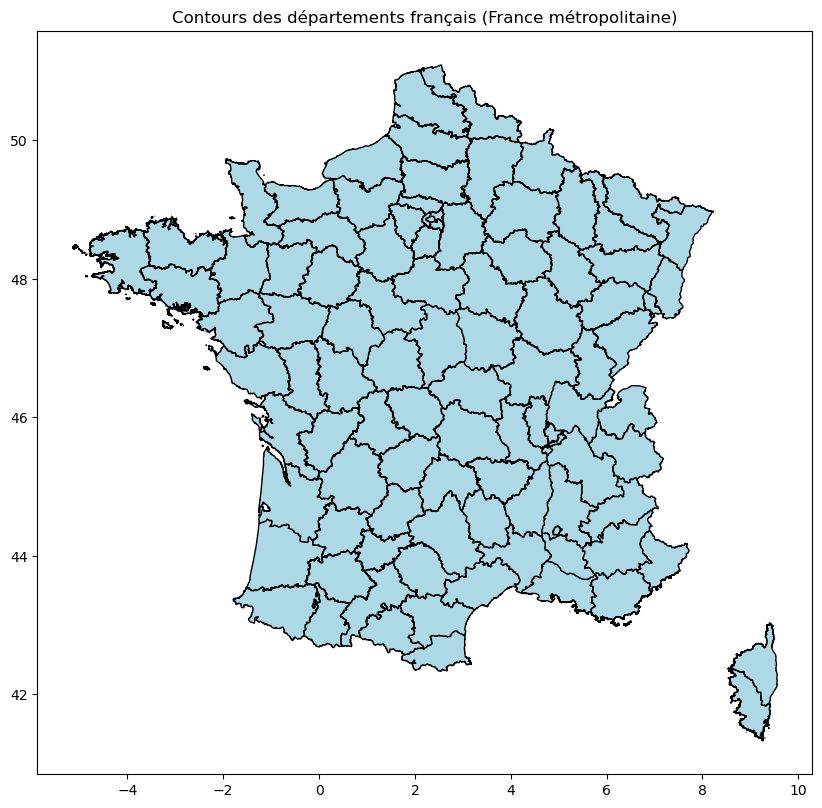

In [49]:
gdf_metropole.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
plt.title("Contours des départements français (France métropolitaine)")
plt.show()

In [50]:
gdf2 = gpd.GeoDataFrame(
    df_epure,
    geometry=gpd.points_from_xy(df_epure["equip_x"], df_epure["equip_y"]),
    crs="EPSG:4326"  # WGS84 (coordonnées géographiques)
)
print(gdf2)

       inst_numero                           inst_nom        dep_nom new_code  \
0       I974110158      "Aire de jeux" Calebassiers 3     La Réunion    97411   
1       I221870011                      "Le Sépulcre"  Côtes-d'Armor    22187   
2       I291900016      "Le circuit de Saint Mathieu"      Finistère    29190   
3       I292150008  "Le circuit de Saint-Demet" N° 22      Finistère    29215   
4       I480880001        "le 107" saut à l'élastique         Lozère    48094   
...            ...                                ...            ...      ...   
166995  I250850001                   étang des pelles          Doubs    25085   
166996  I422930006                    étangs de pêche          Loire    42293   
166997  I690180006                    étape cavalière          Rhône    69018   
166998  I690180006                    étape cavalière          Rhône    69018   
166999  I575340005                  étrier de Moselle        Moselle    57534   

                        new

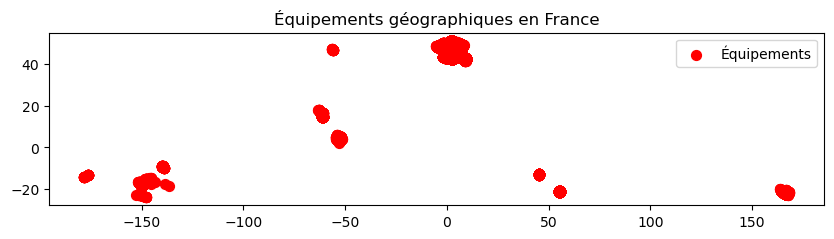

In [39]:
import matplotlib.pyplot as plt

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="lightblue", edgecolor="black")
gdf2.plot(ax=ax, color="red", markersize=50, label="Équipements")
plt.legend()
plt.title("Équipements géographiques en France")
plt.show()

/tmp/ipykernel_121378/1569502398.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
/tmp/ipykernel_121378/1569502398.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)


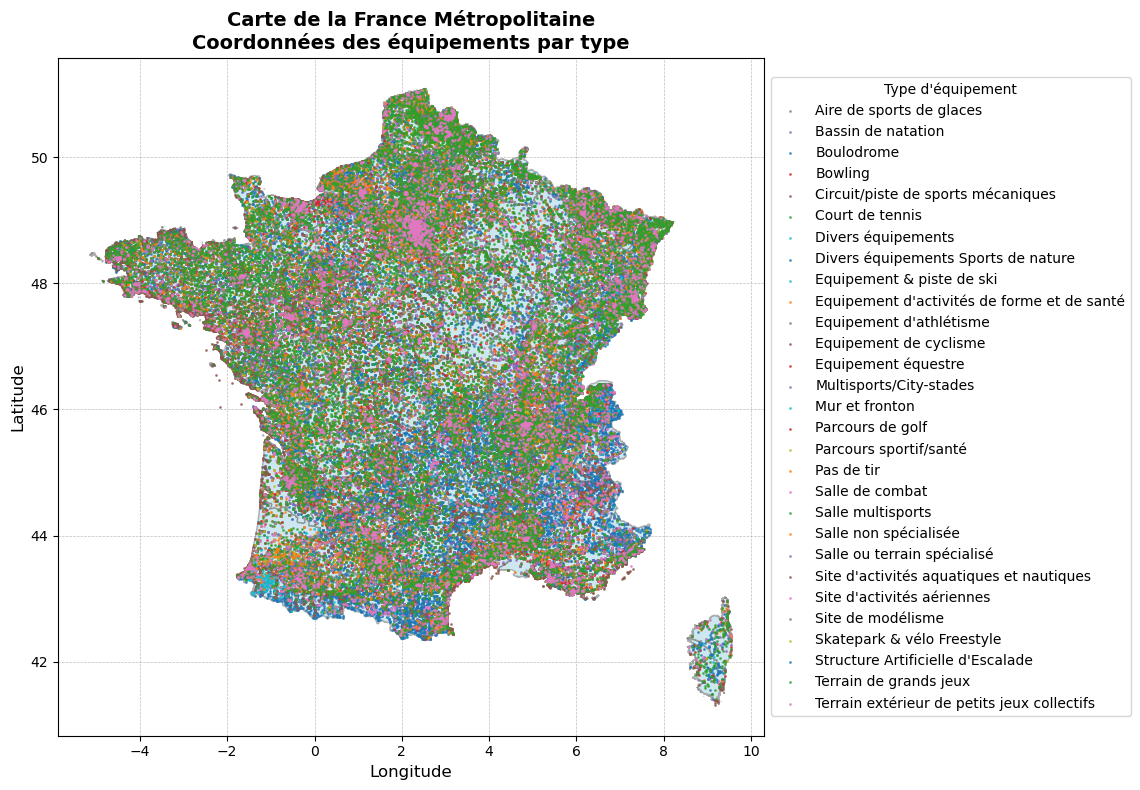

In [51]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Filter points to ensure they are in metropolitan France
df_epure_metropole = df_epure[
    (df_epure['equip_x'] >= -5) & 
    (df_epure['equip_x'] <= 10) & 
    (df_epure['equip_y'] >= 41) & 
    (df_epure['equip_y'] <= 52)
]

# Generate a color map for equipment types
equip_types = df_epure_metropole['equip_type_famille'].unique()
cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
color_dict = {etype: cmap(i) for i, etype in enumerate(equip_types)}

# Assign colors to each equipment type
df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)

# Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map of metropolitan France
gdf_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Plot points with equipment types
for equip_type, group in df_epure_metropole.groupby('equip_type_famille'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[equip_type],
        s=1,  # Adjust size for better visibility
        alpha=0.7,
        label=equip_type
    )

# Add legend
ax.legend(
    title="Type d'équipement",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Customize the plot
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par type', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
print(df_epure['inst_acc_handi_bool'])

0         False
1          True
2         False
3          True
4         False
          ...  
166995    False
166996     True
166997    False
166998    False
166999    False
Name: inst_acc_handi_bool, Length: 167000, dtype: object


In [ ]:
score_handi = df_epure.copy()

# Transformer les booléens
score_handi['acc_handi'] = np.where(score_handi['inst_acc_handi_bool'] == True, 1, 0)
score_handi['acc_handi_aire'] = np.where(score_handi['equip_pmr_aire'] == True, 1, 0)
score_handi['acc_handi_sanit'] = np.where(score_handi['equip_pmr_sanit'] == True, 1, 0)

print(score_handi[['inst_acc_handi_bool', 'acc_handi', 'equip_pmr_sanit', 'acc_handi_sanit']].head(20))

   inst_acc_handi_bool  acc_handi equip_pmr_sanit  acc_handi_sanit
0                False          0             NaN                0
1                 True          1           False                0
2                False          0           False                0
3                 True          1           False                0
4                False          0             NaN                0
5                  NaN          0             NaN                0
6                 True          1           False                0
7                False          0           False                0
8                 True          1             NaN                0
9                 True          1             NaN                0
10               False          0           False                0
11               False          0           False                0
12               False          0           False                0
13               False          0           False             

In [73]:
#Calculer le score
# Calculer le score moyen des trois colonnes
score_handi['score'] = score_handi[['acc_handi', 'acc_handi_aire', 'acc_handi_sanit']].mean(axis=1)
score_handi['score'] = score_handi['score'].round(2)

# Vérifier les résultats
print(score_handi[['score']].head())


   score
0   0.00
1   0.67
2   0.00
3   0.33
4   0.00


In [75]:
table_contingence = pd.crosstab(score_handi['dens_lib'], score_handi['score'])
print(table_contingence)

score                            0.00  0.33   0.67  1.00
dens_lib                                                
Bourgs ruraux                   12322  6827  12040  4368
Ceintures urbaines               4299  2880   5133  2362
Centres urbains intermédiaires   4153  2844   5180  3130
Grands centres urbains           6843  4777   9161  4736
Petites villes                   3545  2153   3421  1766
Rural à habitat dispersé        23153  8031  16213  3380
Rural à habitat très dispersé    7840  1641   2954   583


In [77]:
# Create accessibility categories
conditions = [
    (score_handi['score'] == 0),
    (score_handi['score'] == 0.33),
    (score_handi['score'] == 0.67),
    (score_handi['score'] == 1)
]
choices = ['acces_nul', 'acces_min', 'acces_part', 'acces_total']
score_handi['accessibilite_pmr'] = np.select(conditions, choices, default=None)
print(score_handi['accessibilite_pmr'].head())

0     acces_nul
1    acces_part
2     acces_nul
3     acces_min
4     acces_nul
Name: accessibilite_pmr, dtype: object


/tmp/ipykernel_121378/126653655.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(accessibilite))  # Utilisation d'une colormap qualitative
/tmp/ipykernel_121378/126653655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_handi_metropole['color'] = score_handi_metropole['accessibilite_pmr'].map(color_dict)


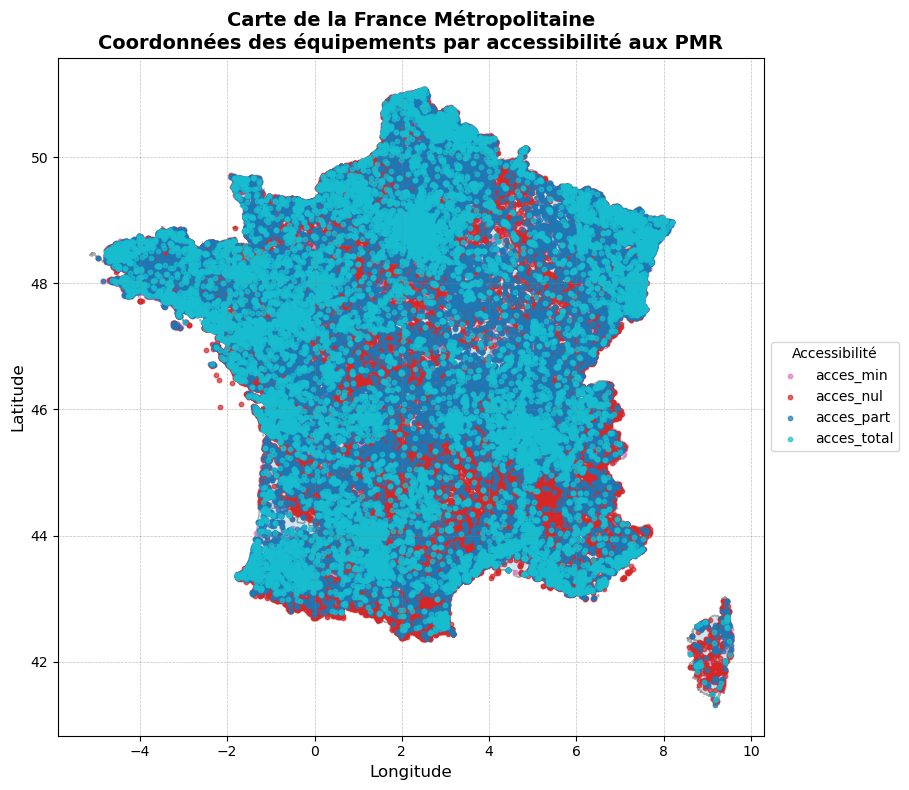

In [82]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Filtrage des données pour la France métropolitaine
score_handi_metropole = score_handi[
    (score_handi['equip_x'] >= -5) & 
    (score_handi['equip_x'] <= 10) & 
    (score_handi['equip_y'] >= 41) & 
    (score_handi['equip_y'] <= 52)
]

# Générer une carte de couleurs pour l'accessibilité
accessibilite = score_handi_metropole['accessibilite_pmr'].unique()
cmap = get_cmap("tab10", len(accessibilite))  # Utilisation d'une colormap qualitative
color_dict = {etype: cmap(i) for i, etype in enumerate(accessibilite)}

# Attribuer des couleurs à chaque type d'équipement
score_handi_metropole['color'] = score_handi_metropole['accessibilite_pmr'].map(color_dict)

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer la carte de base de la France métropolitaine
gdf_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Tracer les points avec les types d'équipement
for accessibilite, group in score_handi_metropole.groupby('accessibilite_pmr'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[accessibilite],
        s=10,  # Ajuster la taille pour une meilleure visibilité
        alpha=0.7,
        label=accessibilite
    )

# Ajouter la légende
ax.legend(
    title="Accessibilité",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Personnaliser le graphique
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par accessibilité aux PMR', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Afficher le graphique
plt.show()